In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import keras
from tqdm import tqdm
from random import randint
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM,Dense, Dropout, SpatialDropout1D
from tensorflow.keras.layers import Embedding
from tensorflow.keras.layers import Lambda
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.layers import InputLayer
import numpy as np
import json
from google.colab import drive
drive.mount('/drive')

Mounted at /drive


In [ ]:
# Extract input and labels

with open('/drive/My Drive/Colab Notebooks/6.7900 project/reviews_amazon_instant_video_twitterglove.npy', 'rb') as f:
    input = np.load(f, allow_pickle=True)
    labels = np.load(f, allow_pickle=True)

In [ ]:
print(input.shape)
print(labels.shape)

(37126, 200, 25)
(37126, 5)


In [ ]:
# Architecture

model = Sequential()
model.add(InputLayer(input_shape=(input.shape[1], input.shape[2]), name='Input_Layer'))
model.add(SpatialDropout1D(0.25))
model.add(LSTM(50, dropout=0.5, recurrent_dropout=0.5))
model.add(Dropout(0.2))
model.add(Dense(5, activation='softmax'))
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 spatial_dropout1d (SpatialD  (None, 200, 25)          0         
 ropout1D)                                                       
                                                                 
 lstm (LSTM)                 (None, 50)                15200     
                                                                 
 dropout (Dropout)           (None, 50)                0         
                                                                 
 dense (Dense)               (None, 5)                 255       
                                                                 
Total params: 15,455
Trainable params: 15,455
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
# Training

training = model.fit(input, labels, validation_split=0.2, epochs=10, batch_size=32)

Epoch 1/10
 13/929 [..............................] - ETA: 1:47 - loss: 1.4711 - accuracy: 0.4183

KeyboardInterrupt: ignored

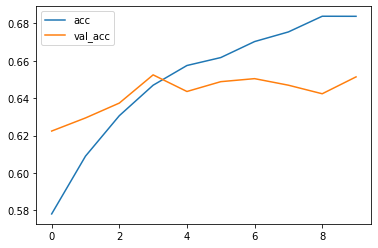

In [ ]:
# Plot Accuracy
plt.plot(training.history['accuracy'], label='acc')
plt.plot(training.history['val_accuracy'], label='val_acc')
plt.legend()
plt.show()

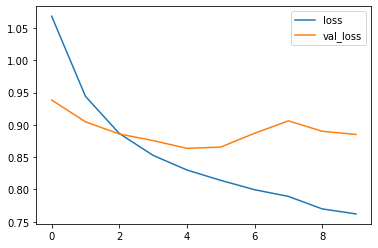

<Figure size 432x288 with 0 Axes>

In [ ]:
# Plot Loss
plt.plot(training.history['loss'], label='loss')
plt.plot(training.history['val_loss'], label='val_loss')
plt.legend()
plt.show()
plt.savefig("Loss plt.jpg")

In [ ]:
# Make a sentiment analysis function
def predict_sentiment(text):
    tw = tokenizer.texts_to_sequences([text])
    tw = pad_sequences(tw,maxlen=200)
    dist = baseline_model.predict(tw, verbose = 0)
    high_prob = 0
    score = 0
    for idx in range(5):
        if dist[0][idx] > high_prob:
            high_prob = dist[0][idx]
            score = idx
    score += 1
    return score

In [ ]:
# Extract new data
reviews = []
scores = []
with open("/drive/My Drive/6.7900 project/Digital_Music_5.json", "r") as file:
    for line in file:
        loaded = json.loads(line)
        if "reviewText" in loaded and "overall" in loaded:
            reviews.append(loaded["reviewText"])
            scores.append(loaded["overall"])

In [ ]:
# Find accuracy in new data
correct = 0
total = 100 # len(reviews)
for idx in tqdm(range(total)):
    if predict_sentiment(reviews[idx]) == int(scores[idx]):
        correct += 1
print("accuracy =", correct / total)

100%|██████████| 100/100 [00:23<00:00,  4.22it/s]

accuracy = 0.8
